# Pertanyaan penelitian

Pada kesempatan ini, saya akan membuat model dari data training untuk mengklasifikasikan data uji.
Saya ingin melihat dengan fitur yang dimiliki apakah pelanggan akan *churn* atau tidak.
Algoritma yang akan digunakan adalah *Logistic Regression*

# 1. Data collection

In [1]:
# import library
import pandas as pd
import sklearn.feature_selection
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [2]:
# memanggil data ke dalam variabel data_mentah untuk telecom_train dan data_uji untuk telecom_uji
data_mentah = pd.read_csv('telecom_train.csv')
data_uji = pd.read_csv('telecom_uji.csv')

In [3]:
# menampilkan data mentah
data_mentah

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


-----------------------
**Penjelasan dataset**

Kumpulan data ini berisi informasi pelanggan untuk perusahaan telekomunikasi dengan jumlah 3333. Setiap kolom menjelaskan atribut yang berkaitan dengan layanan yang digunakan pelanggan.
- Churn = 1 jika pelanggan berhenti berlangganan, 0 jika tidak.
- AccountWeeks = Lamanya akun telah aktif (dalam minggu).
- ContractRenewal = 1 jika pelanggan baru saja memperbarui kontrak, 0 jika tidak.
- DataPlan = 1 jika pelanggan memiliki paket data, 0 jika tidak.
- DataUsage = Penggunaan data bulanan (dalam gigabyte).
- CustServCalls = Jumlah panggilan ke layanan pelanggan.
- DayMins = Rata-rata durasi panggilan (dalam menit) per bulan.
- DayCalls = Rata-rata jumlah panggilan tiap hari.
- MonthlyCharge = Rata-rata tagihan bulanan.
- OverageFee = Biaya kelebihan terbesar dalam 12 bulan terakhir.
- RoamMins = Rata-rata jumlah *roaming* (dalam menit). 

In [4]:
# mengecek dataset
data_mentah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
data_mentah.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


----------------------------------------
Tidak ada baris dan kolom yang kosong, serta seluruh tipe data berbentuk numerik. Sehingga data mentah sudah dapat diolah.

In [6]:
# menampilkan data uji
data_uji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            0 non-null      float64
 1   AccountWeeks     40 non-null     int64  
 2   ContractRenewal  40 non-null     int64  
 3   DataPlan         40 non-null     int64  
 4   DataUsage        40 non-null     float64
 5   CustServCalls    40 non-null     int64  
 6   DayMins          40 non-null     float64
 7   DayCalls         40 non-null     int64  
 8   MonthlyCharge    40 non-null     float64
 9   OverageFee       40 non-null     float64
 10  RoamMins         40 non-null     float64
dtypes: float64(6), int64(5)
memory usage: 3.6 KB


---------------------------------------------
Seluruh baris dalam kolom *churn* pada data uji masih kosong. Hal ini dikarenakan komponen tersebut yang akan diklasifikasikan berdasarkan hasil modelling data mentah.

# 2. Data preparation

In [7]:
# pengecekan fitur
# disini kita akan mengecek fitur mana saja yang memiliki hubungan signifikan dengan label

# label adalah kolom Churn
label = data_mentah.iloc[:,[0]]

# fitur adalah seluruh kolom selain kolom Churn
fitur = data_mentah.iloc[:,1:11]

In [8]:
# pengujian fitur terhadap label
model_lr = LogisticRegression(max_iter=5000)
rfe = sklearn.feature_selection.RFE(model_lr)
rfe.fit(fitur,label.values.ravel())
print(f'Support = {rfe.support_}')
print(f'Ranking = {rfe.ranking_}')

Support = [False  True  True  True  True False False False False  True]
Ranking = [6 1 1 1 1 4 5 2 3 1]


In [9]:
# fitur yang akan digunakan adalah yang memiliki ranking 1 karena memiliki hubungan signifikan dengan label.
# Membuat variabel use_fitur mengikuti kolom terbaik.
use_fitur = data_mentah[['ContractRenewal','DataPlan','DataUsage','CustServCalls','RoamMins']]

# 3. Data processing

**Penentuan sampling**

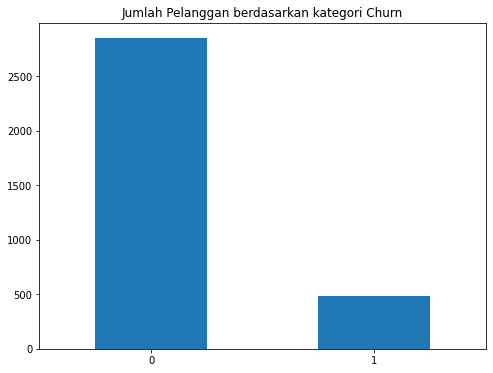

In [12]:
# Mengecek proporsi data
data_mentah['Churn'].value_counts().plot.bar(figsize=(8,6),title="Jumlah Pelanggan berdasarkan kategori Churn")
plt.xticks(rotation=360);

Berdasarkan grafik di atas terlihat bahwa proporsi data tidak seimbang, dimana jumlah data pelanggan yang tetap berlangganan jauh lebih banyak dibandingkan yang berhenti berlangganan.

Oleh karenanya akan dilakukan tiga pengujian, yaitu tanpa pengubahan proporsi data, dengan oversampling dan undersampling.

**Pengujian pada Data asli**

In [13]:
# data mentah dibagi menjadi data training dan test dengan test_size = 0.2
X_train,X_test,y_train,y_test = train_test_split(use_fitur,label, test_size = 0.2, random_state=6)

print(f'dimensi dari X_train : {len(X_train)}')
print(f'dimensi dari y_train : {len(y_train)}')
print(f'dimensi dari X_test : {len(X_test)}')
print(f'dimensi dari y_test : {len(y_test)}')

dimensi dari X_train : 2666
dimensi dari y_train : 2666
dimensi dari X_test : 667
dimensi dari y_test : 667


**Oversampling menggunakan SMOTE**

In [14]:
# Menyamakan proporsi kelas minoritas dengan oversampling
sm = SMOTE(random_state = 6)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train.values.ravel())

**Undersampling menggunakan Nearmiss**

In [15]:
nr = NearMiss()
X_train_under, y_train_under = nr.fit_resample(X_train, y_train.values.ravel())

In [16]:
print(f'Jumlah label 0: {sum(y_train.values.ravel() == 0)}')
print(f'Jumlah label 1: {sum(y_train.values.ravel() == 1)}')
print("-------------------------------------")
print(f'Setelah OverSampling, Jumlah label 0: {sum(y_train_over == 0)}')
print(f'Setelah OverSampling, Jumlah label 1: {sum(y_train_over == 1)}')
print("-------------------------------------")
print(f'Setelah UnderSampling, Jumlah label 0: {sum(y_train_under == 0)}')
print(f'Setelah UnderSampling, Jumlah label 1: {sum(y_train_under == 1)}')

Jumlah label 0: 2279
Jumlah label 1: 387
-------------------------------------
Setelah OverSampling, Jumlah label 0: 2279
Setelah OverSampling, Jumlah label 1: 2279
-------------------------------------
Setelah UnderSampling, Jumlah label 0: 387
Setelah UnderSampling, Jumlah label 1: 387


--------------------------------------------
Terlihat bahwa setelah dioversampling, proporsi data menjadi seimbang mengikuti jumlah data mayoritas. Sedangkan saat dilakukan UnderSampling, proporsi data mengikuti jumlah data minoritas.

**Training data asli**

In [17]:
# training model
model_lr.fit(X_train,y_train.values.ravel())
label_predict = model_lr.predict(X_test)

# Evaluasi label_predict
print("normal")
print(classification_report(y_test, label_predict))

normal
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       571
           1       0.78      0.19      0.30        96

    accuracy                           0.88       667
   macro avg       0.83      0.59      0.62       667
weighted avg       0.87      0.88      0.84       667



Nilai accuracy dikategorikan baik, diatas 0.8. Tetapi perlu dilihat bahwa nilai recall pada kelas minoritas terbilang rendah yaitu 0.19. Hal ini menunjukkan bahwa model lebih bias terhadap kelas mayoritas.

**Training Oversampling Data**

In [18]:
# training model
model_lr_over = LogisticRegression(max_iter=5000)
model_lr_over.fit(X_train_over, y_train_over)
label_predict_over = model_lr_over.predict(X_test)
  
# Evaluasi label_predict
print("oversampling")
print(classification_report(y_test, label_predict_over))

oversampling
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       571
           1       0.29      0.62      0.40        96

    accuracy                           0.73       667
   macro avg       0.61      0.68      0.61       667
weighted avg       0.83      0.73      0.76       667



Terjadi penurunan akurasi, tetapi hasil yang akan kita prediksi (angka 1) memiliki nilai recall yang jauh lebih baik. Model ini lebih baik dibandingkan model sebelumnya yang terlalu menghapal data berlabel 0, tetapi tidak mampu memprediksi data berlabel 1. 

**Training UnderSampling Data**

In [19]:
# training model
model_lr_under = LogisticRegression(max_iter=5000)
model_lr_under .fit(X_train_under, y_train_under)
label_predict_under = model_lr_under.predict(X_test)
  
# Evaluasi label_predict
print("undersampling")
print(classification_report(y_test, label_predict_under))

undersampling
              precision    recall  f1-score   support

           0       0.90      0.49      0.63       571
           1       0.18      0.68      0.29        96

    accuracy                           0.51       667
   macro avg       0.54      0.58      0.46       667
weighted avg       0.80      0.51      0.58       667



Memiliki nilai accuracy yang rendah, model ini tidak mampu untuk memprediksi apakah pelanggan akan churn atau tidak

# 4. Labelling

Model yang akan digunakan adalah model dengan sampel yang telah dioversampling, karena memiliki nilai recall yang baik.

In [20]:
# Prediksi data_uji
# kolom yang digunakan sama dengan kolom pada use_fitur
fitur_uji = data_uji[['ContractRenewal','DataPlan','DataUsage','CustServCalls','RoamMins']]
label_predict_uji_over = model_lr_over.predict(fitur_uji)

# tampilkan data_uji yang telah diklasifikasi
y = data_uji.copy()
y['Churn'] = label_predict_uji_over
y.sort_values(by='Churn',ascending=False)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
12,1,106,1,0,0.00,2,210.6,96,57.0,12.46,12.4
8,1,135,0,1,3.94,0,173.1,85,86.4,10.20,14.6
25,1,117,0,0,0.00,2,167.1,86,44.0,8.88,14.1
26,1,140,1,0,0.00,3,231.9,99,54.0,8.01,14.3
1,1,93,1,0,0.00,3,190.7,114,41.0,10.91,8.1
14,1,94,1,0,0.00,4,157.9,105,41.0,7.75,8.0
33,1,99,1,0,0.00,3,217.2,112,58.0,12.34,15.8
10,1,140,1,0,0.38,3,85.8,77,32.8,8.27,9.2
23,1,157,0,0,1.84,3,192.6,107,68.4,9.78,6.8
35,1,144,0,0,0.00,0,203.5,100,56.0,12.38,11.9


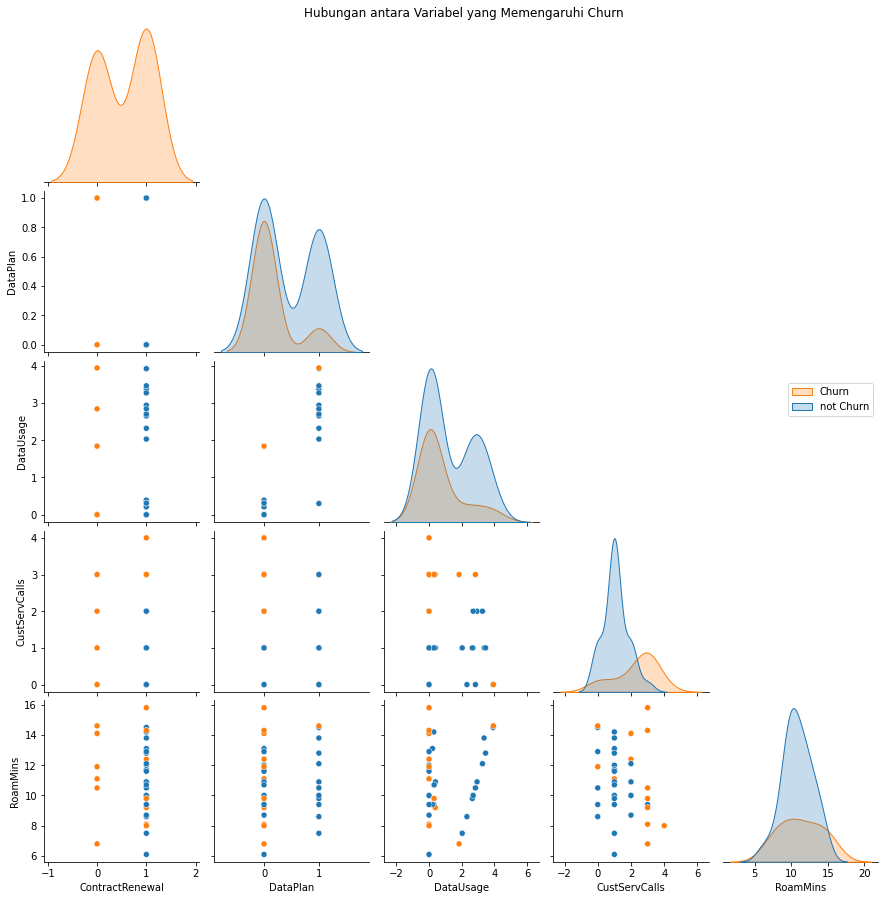

In [56]:
# visualisasi
g = sns.pairplot(data=y,vars=['ContractRenewal','DataPlan','DataUsage','CustServCalls','RoamMins'],
             hue="Churn",corner=True)
g._legend.remove()
g.fig.suptitle("Hubungan antara Variabel yang Memengaruhi Churn", y=1)
plt.legend(labels=['Churn','not Churn'],bbox_to_anchor=(1,3))
plt.show(g)

Variabel yang dapat memprediksi apakah pelanggan akan churn atau tidak adalah:
   - Contract Renewal = Tidak ditemukan pelanggan yang memperbarui kontraknya akan diberi label churn(warna jingga). Berarti untuk mengurangi tingkat churn, perusahaan perlu membuat program perpanjangan kontrak yang menarik.
   - Data Plan = Pelanggan yang dikategorikan churn memiliki Paket data yang lebih rendah dibandingkan yang tidak.
   - Data Usage = Pelanggan yang dikatogirkan churn memiliki penggunaan data yang lebih rendah dibandingkan yang tidak.
   - Cust Serv Calss = Kebanyakan pelanggan yang menelpon layanan pelanggan sebanyak 0-3 dikategorikan tidak churn. Pelanggan yang menghubungi >3 punya kecendrungan untuk berhenti berlangganan.
   - Roam Mins = Pelanggan yang berhenti berlanggan melakukan roaming lebih rendah dibandingkan yang tetap berlangganan.

Variabel yang tidak berkaitan signifikan dengan pola churn pelanggan:
   - AccountWeeks = Lamanya seseorang sudah jadi pengguna produk tidak berkaitan dengan pola churn pelanggan. Hal ini berarti, perusahaan tidak perlu mengkhawatirkan apakah pengguna baru akan menjadi pengguna yang loyal atau tidak.
   - DayMins = Tidak terlihat hubungan signifikan antara churn dengan durasi panggilan yang dilakukan pengguna.
   - DayCalls = Jumlah panggilan tiap hari tidak berkaitan dengan pola churn pelanggan.
   - MonthlyCharge = Harga paket yang ditawarkan kepada pengguna tidak memiliki hubungan signifikan terhadap keputusan untuk berhenti berlangganan.
   - OverageFee = Biaya yang dikeluarkan pengguna saat melewati limit paket, tidak memiliki hubungan signifikan dengan keputusan untuk berhenti berlangganan.
